Cyclotron Orbit Simulation Using the Boris Algorithm

Robert Buckley (no group so all work is mine)

(see the project report pdf for further explanations of code, analysis, and conclusions, etc)

In [56]:
#import libraries
from matplotlib import patches
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#create constants
num_iterations = 1000
mass = 1.6726e-25 #kg
charge = 1.6e-19 #C
B = np.array([0, 0, 1]) #T
gap = .0005 #m

frequency = (charge * np.linalg.norm(B)) / (2 * np.pi * mass) #hz
period = 1 / frequency #s
time = 10 * period #s
dt = time / num_iterations #s
t = np.arange(0, time, dt)
rect_height = 100

In [58]:
import numpy as np


class Particle:


    def __init__(self, mass, charge, x, y, z, vx, vy, vz, accurate=True):
        '''Initializes particle with given mass, charge, position, velocity, and integration scheme'''
        self.mass = mass
        self.charge = charge
        self.pos = np.array([x,y,z])
        self.vel = np.array([vx,vy,vz])
        self.accel = np.array([0,0,0])
        self.accurate = accurate

    def update(self, gap, e_magnitude, B, dt):
        '''Calls the correct update function based on the type of particle simulation'''
        if self.accurate:
            self.update_boris(gap, e_magnitude, B, dt)
        else:
            self.update_standard(gap, e_magnitude, B, dt)

    def update_boris(self, gap, e_magnitude, B, dt):
        '''Updates the position and velocity of the particle inside a cyclotron over some timestep dt
        with given gap, constant magnetic field, and square wave electric field with given magnitude.
        Uses the boris algorithm to calculate the update.'''
        E = self.getE(gap, e_magnitude)
        self.vel = self.vel + (self.charge * E * dt) / (2 * self.mass)
        t = (self.charge * B * dt) / (2 * self.mass)
        v_plus = self.vel + np.cross(self.vel, t)
        s = (2 * t) / (1 + np.linalg.norm(t)**2)
        self.vel = self.vel + np.cross(v_plus, s)
        self.vel = self.vel + (self.charge * E * dt) / (2 * self.mass)
        self.pos = self.pos + self.vel * dt


    def update_standard(self, gap, e_magnitude, B, dt):
        '''Updates the position and velocity of the particle inside a cyclotron over some timestep dt
        with given gap, constant magnetic field, and square wave electric field with given magnitude.
        Uses the standard euler method/riemann sum for the corresponding differential equation.'''
        E = self.getE(gap, e_magnitude)
        force = self.charge * (E + np.cross(self.vel, B))
        self.accel = force / self.mass
        self.vel = self.vel + self.accel * dt
        self.pos = self.pos + self.vel * dt


    def getE(self, gap, e_magnitude):
        '''Returns the an eletric field vector in the same direction as velocity and with given
        magnitude if the particle is between the dees of the cyclotron to simulate a square wave
        electric field with a frequency so that it always increases the speed of the particle'''
        if abs(self.pos[1]) < gap / 2:
            if self.vel[1] > 0:
                return np.array([0, e_magnitude, 0])
            elif self.vel[1] < 0:
                return np.array([0, -1 * e_magnitude, 0])
        return 0

In [59]:
def generate_plot(boris, e_magnitude):
    '''Iteratively calls the update function of a particle constructed with given simulation method
    (boris=false is euler and boris=true is boris) and plots the proton's path, velocity, and energy'''
    xpos, ypos, zpos = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
    xvel, yvel, zvel = np.zeros(num_iterations), np.zeros(num_iterations), np.zeros(num_iterations)
    energy = np.zeros(num_iterations)
    p = Particle(mass, charge, 0, 0, 0, 100, 0, 0, accurate=boris)
    for i in range(num_iterations):
        p.update(gap, e_magnitude, B, dt)
        xpos[i], ypos[i], zpos[i] = p.pos
        xvel[i], yvel[i], zvel[i] = p.vel
        energy[i] = (mass /2) * (np.linalg.norm(p.vel) ** 2)

    fig, axes = plt.subplots(2, 2)
    fig.set_figheight(10)
    fig.set_figwidth(10)

    title = ''
    if boris:
        title = 'Boris algorithm cyclotron simulation with electric field E = {} T'
    else:
        title = 'Standard/Euler algorithm cyclotron simulation with electric field E = {} T'
    fig.suptitle(title.format(e_magnitude))

    rect = patches.Rectangle((-1 * gap * 100/ 2, -1 * rect_height / 2), gap * 100, rect_height, color='r', alpha=.2)
    axes[0][0].plot(xpos * 100, ypos * 100)
    axes[0][0].set_xlabel('x position [cm]')
    axes[0][0].set_ylabel('y position [cm]')
    axes[0][0].set_title('proton\'s path')
    if abs(e_magnitude > .01):
        axes[0][0].add_patch(rect)

    axes[0][1].plot(t * 1e6, xvel)
    axes[0][1].set_xlabel('time [μs]')
    axes[0][1].set_ylabel('x velocity [m/s]')
    axes[0][1].set_title('proton\'s x-velocity vs time')

    axes[1][0].plot(t * 1e6, yvel)
    axes[1][0].set_xlabel('time [μs]')
    axes[1][0].set_ylabel('y velocity [m/s]')
    axes[1][0].set_title('proton\'s x-velocity vs time')

    axes[1][1].plot(t * 1e6, energy * 1e12)
    axes[1][1].set_xlabel('time [μs]')
    axes[1][1].set_ylabel('energy [pJ]')
    axes[1][1].set_title('proton\'s energy vs time')



    plt.show()

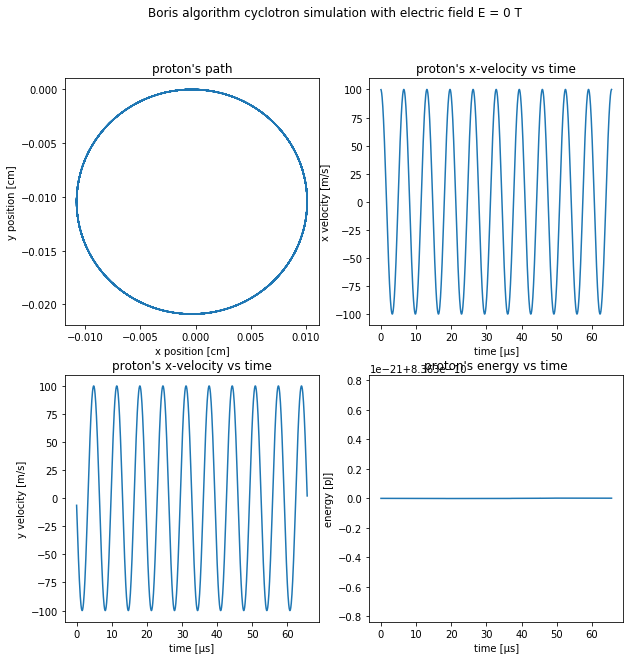

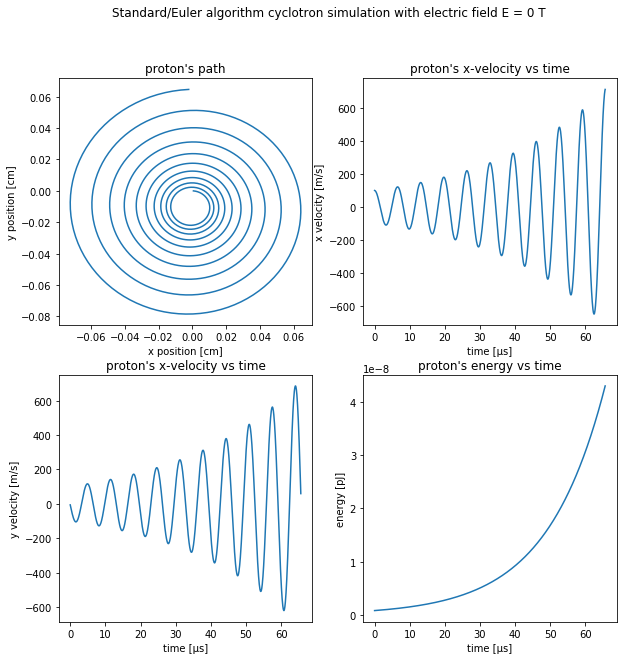

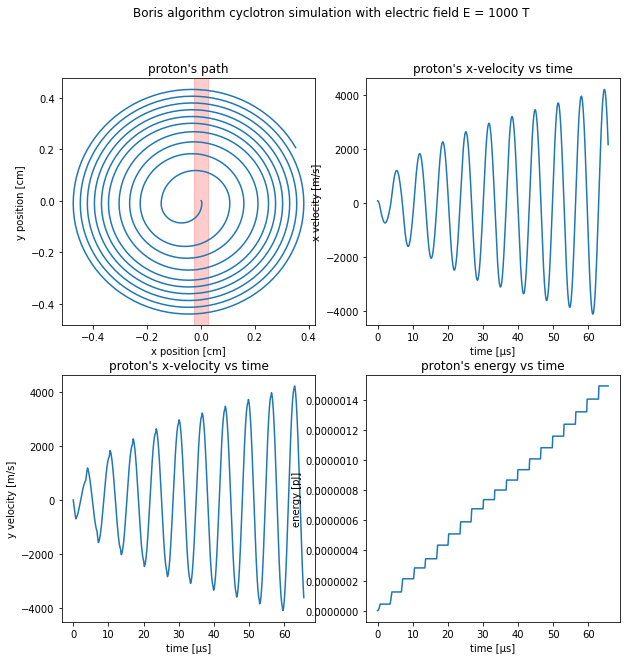

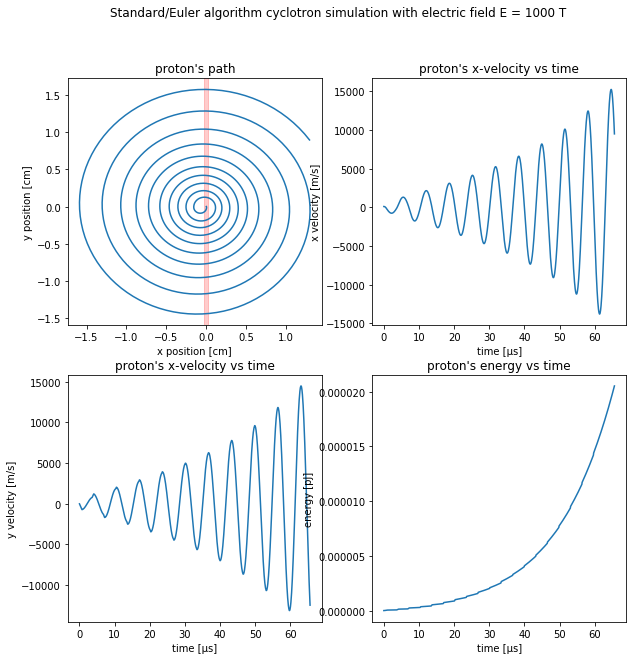

In [60]:
generate_plot(True, 0) #boris algorithm for cyclotron without electric field
generate_plot(False, 0) #standard algorithm for cyclotron without electric field
generate_plot(True, 1000) #boris algorithm for cyclotron with electric field
generate_plot(False, 1000) #standard algorithm for cyclotron with electric field